In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_json("C:/Users/Asus/Desktop/loan_data.json")

## Data has no null value

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Application_ID      511 non-null    object
 1   Gender              511 non-null    object
 2   Married             511 non-null    object
 3   Dependents          511 non-null    object
 4   Education           511 non-null    object
 5   Self_Employed       511 non-null    object
 6   Credit_History      511 non-null    int64 
 7   Property_Area       511 non-null    object
 8   Income              511 non-null    object
 9   Application_Status  511 non-null    object
dtypes: int64(1), object(9)
memory usage: 40.0+ KB


In [5]:
data.tail()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
506,LP002978,Female,No,0,Graduate,No,1,Rural,low,Y
507,LP002979,Male,Yes,3+,Graduate,No,1,Rural,medium,Y
508,LP002983,Male,Yes,1,Graduate,No,1,Urban,medium,Y
509,LP002984,Male,Yes,2,Graduate,No,1,Urban,medium,Y
510,LP002990,Female,No,0,Graduate,Yes,0,Semiurban,medium,N


# Plotting different features with respect to Application status(Approved or not)
## data insights

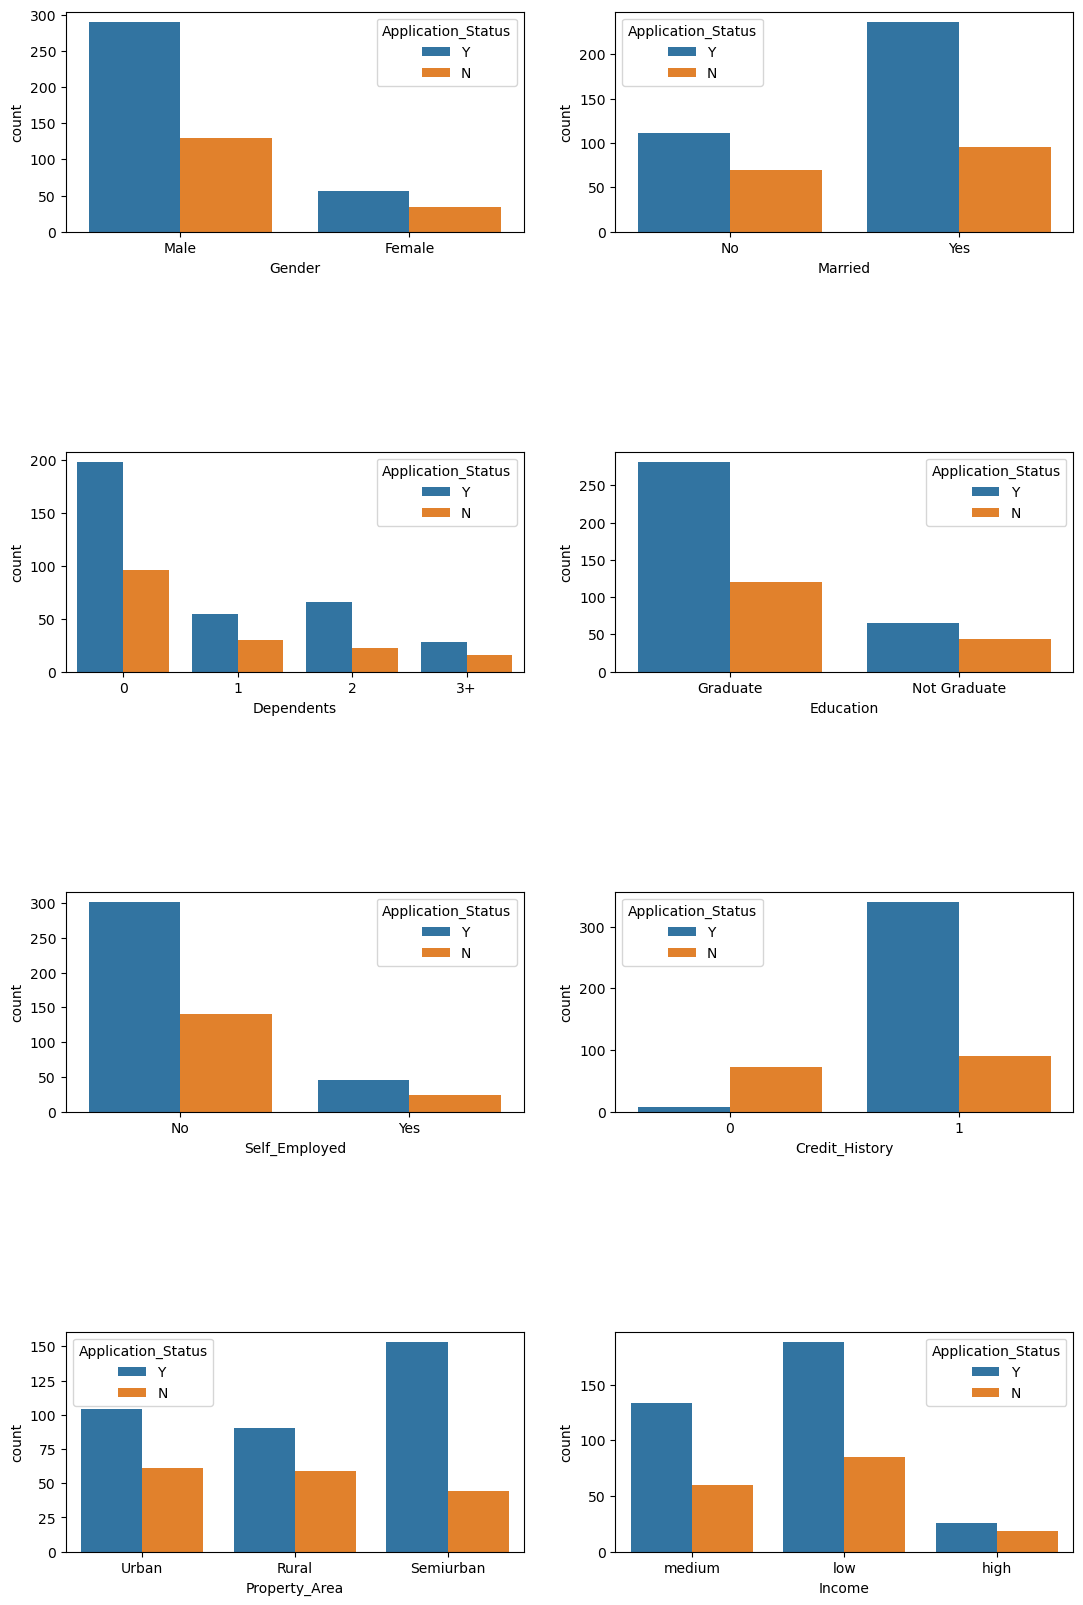

In [6]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Application_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)

In [10]:
data.drop(['Application_ID'],axis=1,inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
column=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income','Application_Status']
all= LabelEncoder()
for i in column:
    data[i] = all.fit_transform(data[i])

In [12]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


In [14]:
x=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y=data.Application_Status
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=7)

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)*100)

88.3495145631068


# accuracy=89 %

In [18]:
x =data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y = data.Application_Status

### Model score

In [19]:
model = LogisticRegression(random_state = 0)
model.fit(x, y)
model.score(x,y)

0.8082191780821918

In [22]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [23]:
loaded_model = pickle.load(open("model.pkl", "rb"))


In [26]:
result = loaded_model.predict([[1, 1, 2, 1, 0, 1, 1, 2]])
print(result)

[1]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# testing prediction code for flask

In [28]:
import pickle
loaded_model = pickle.load(open("model.pkl", "rb")) 
result = loaded_model.predict([[1,1,2,1,0,1,1,2]]) 
print(result[0])

1


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
